In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import urllib.request
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
pd.DataFrame(y)

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [2]:
cust_df = pd.read_csv("C:/Users/pramo/Desktop/IDeators/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
cust_df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [4]:
print(cust_df.isnull().sum().sort_values(ascending = False))
print('Shape', cust_df.shape)

Defaulted          150
DebtIncomeRatio      0
Address              0
Other Debt           0
Card Debt            0
Income               0
Years Employed       0
Edu                  0
Age                  0
Customer Id          0
dtype: int64
Shape (850, 10)


In [5]:
cust_df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [6]:
#cust_df[cust_df['Defaulted'] == 0.0]['Income'].astype('float').values

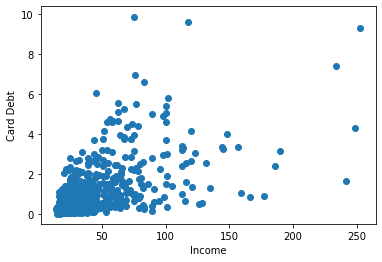

In [7]:
#cust_df.plot(kind= 'scatter', x=cust_df[cust_df['Defaulted'] == 0.0]['Income'].astype('float'), y=cust_df[cust_df['Defaulted'] == 0.0]['Card Debt'].astype('float'))
#cust_df.plot(kind= 'scatter', x='Income', y='Defaulted')

plt.scatter(x=cust_df[cust_df['Defaulted'] == 0.0]['Income'].values, y=cust_df[cust_df['Defaulted'] == 0.0]['Card Debt'].values)
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.show()

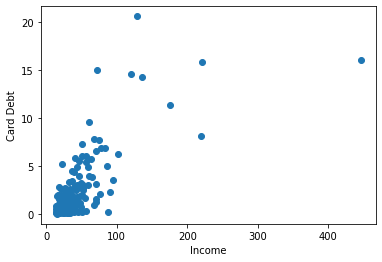

In [8]:
plt.scatter(x=cust_df[cust_df['Defaulted'] == 1.0]['Income'].values, y=cust_df[cust_df['Defaulted'] == 1.0]['Card Debt'].values )
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.show()

In [9]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


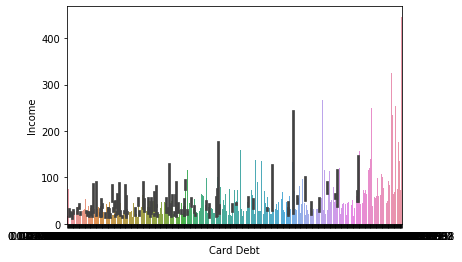

In [10]:
sns.barplot(data = cust_df ,y ='Income',x='Card Debt' )

In [11]:
x_def =cust_df[cust_df['Defaulted'].notnull()][['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio']].astype('float').values
x_to_pred = cust_df[cust_df['Defaulted'].isnull()][['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio']].astype('float').values
y_def = cust_df[cust_df['Defaulted'].notnull()]['Defaulted']

In [12]:
cust_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [13]:
print(x_def.shape)
print(x_to_pred.shape)
print(y_def.shape)

(700, 7)
(150, 7)
(700,)


In [14]:
xtr, xte, ytr, yte= train_test_split(x_def,y_def , train_size= 0.7 , random_state=7)
print('Training Set shape',xtr.shape, xte.shape)
print('Training Set shape',ytr.shape, yte.shape)

Training Set shape (489, 7) (211, 7)
Training Set shape (489,) (211,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=110)
cls.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
pred = cls.predict(xte)

In [17]:
print('Train Accuracy',accuracy_score(cls.predict(xtr), ytr))
print('Test Accuracy',accuracy_score(pred , yte))

Train Accuracy 1.0
Test Accuracy 0.7962085308056872


In [18]:
y_predicted = cls.predict(x_to_pred)
y_predicted

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.])

In [19]:
y_predicted = pd.DataFrame(y_predicted)

In [20]:
y_predicted.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [21]:
d = pd.DataFrame(x_to_pred)

In [22]:
d[7] = y_predicted

In [23]:
features =cust_df[cust_df['Defaulted'].notnull()][['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio', 'Defaulted']]

In [24]:
features = features.astype('float')

In [25]:
d.columns = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio', 'Defaulted']

In [26]:
d.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted
0,40.0,1.0,23.0,81.0,0.998,7.831,10.9,0.0
1,26.0,1.0,5.0,18.0,0.575,2.215,15.5,0.0
2,34.0,2.0,9.0,40.0,0.374,0.266,1.6,0.0
3,46.0,1.0,6.0,30.0,1.415,3.865,17.6,0.0
4,24.0,1.0,1.0,16.0,0.185,1.287,9.2,1.0


In [27]:
features = pd.concat([features,d] ,ignore_index=True , sort= False )

In [28]:
features.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted
0,41.0,2.0,6.0,19.0,0.124,1.073,6.3,0.0
1,47.0,1.0,26.0,100.0,4.582,8.218,12.8,0.0
2,33.0,2.0,10.0,57.0,6.111,5.802,20.9,1.0
3,29.0,2.0,4.0,19.0,0.681,0.516,6.3,0.0
4,47.0,1.0,31.0,253.0,9.308,8.908,7.2,0.0


In [29]:
print(features.shape)

(850, 8)


In [37]:
print(features.columns)
print(cust_df.columns)

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'DebtIncomeRatio', 'Defaulted'],
      dtype='object')
Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')


In [42]:
x = features.values
x = preprocessing.StandardScaler().fit_transform(x)
print(x[1:5])

[[ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
   0.39138677 -0.56919903]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.59755385  1.75685471]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.57652509 -0.56919903]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.44250653 -0.56919903]]


In [43]:
from sklearn.cluster import KMeans
clust = KMeans(init= 'k-means++', n_clusters= 3, n_init=12)
clust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
labels = clust.labels_
features['Cust_Class'] = labels

In [49]:
features.head(10)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted,Cust_Class
0,41.0,2.0,6.0,19.0,0.124,1.073,6.3,0.0,2
1,47.0,1.0,26.0,100.0,4.582,8.218,12.8,0.0,1
2,33.0,2.0,10.0,57.0,6.111,5.802,20.9,1.0,0
3,29.0,2.0,4.0,19.0,0.681,0.516,6.3,0.0,2
4,47.0,1.0,31.0,253.0,9.308,8.908,7.2,0.0,1
5,38.0,2.0,4.0,56.0,0.442,0.454,1.6,0.0,2
6,42.0,3.0,0.0,64.0,0.279,3.945,6.6,0.0,2
7,47.0,3.0,23.0,115.0,0.653,3.947,4.0,0.0,1
8,44.0,3.0,8.0,88.0,0.285,5.083,6.1,1.0,0
9,24.0,1.0,7.0,18.0,0.526,0.643,6.5,0.0,2


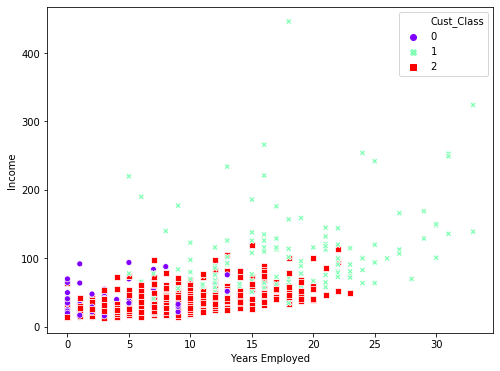

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=features, y='Income', x='Years Employed', hue= 'Cust_Class',style="Cust_Class", palette='rainbow')

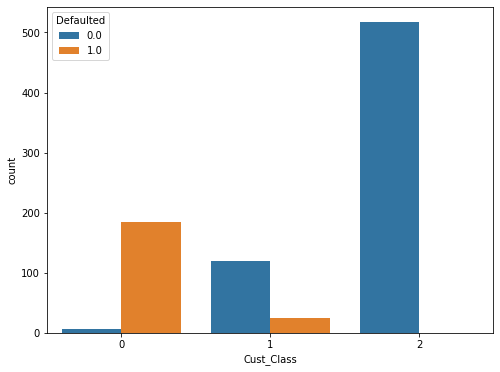

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(data=features, hue='Defaulted', x='Cust_Class')


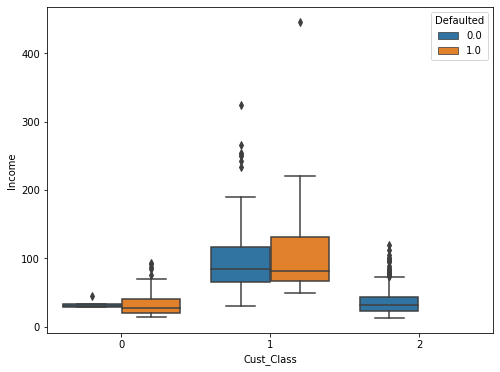

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot( x='Cust_Class',y = 'Income',data =features, hue='Defaulted')